<a href="https://colab.research.google.com/github/kozoB/image-processing-assignment-1/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing - Assignment 1

# Task 1

Mounted at /content/drive
Original image shape: (321, 481)
Edge coordinates shape: (929, 2)

Evaluation Metrics:
Original Canny - Precision: 0.0066, Recall: 0.1146, F1: 0.0124
Canny after HE - Precision: 0.0060, Recall: 0.1552, F1: 0.0116
Canny after CLAHE - Precision: 0.0074, Recall: 0.2046, F1: 0.0142


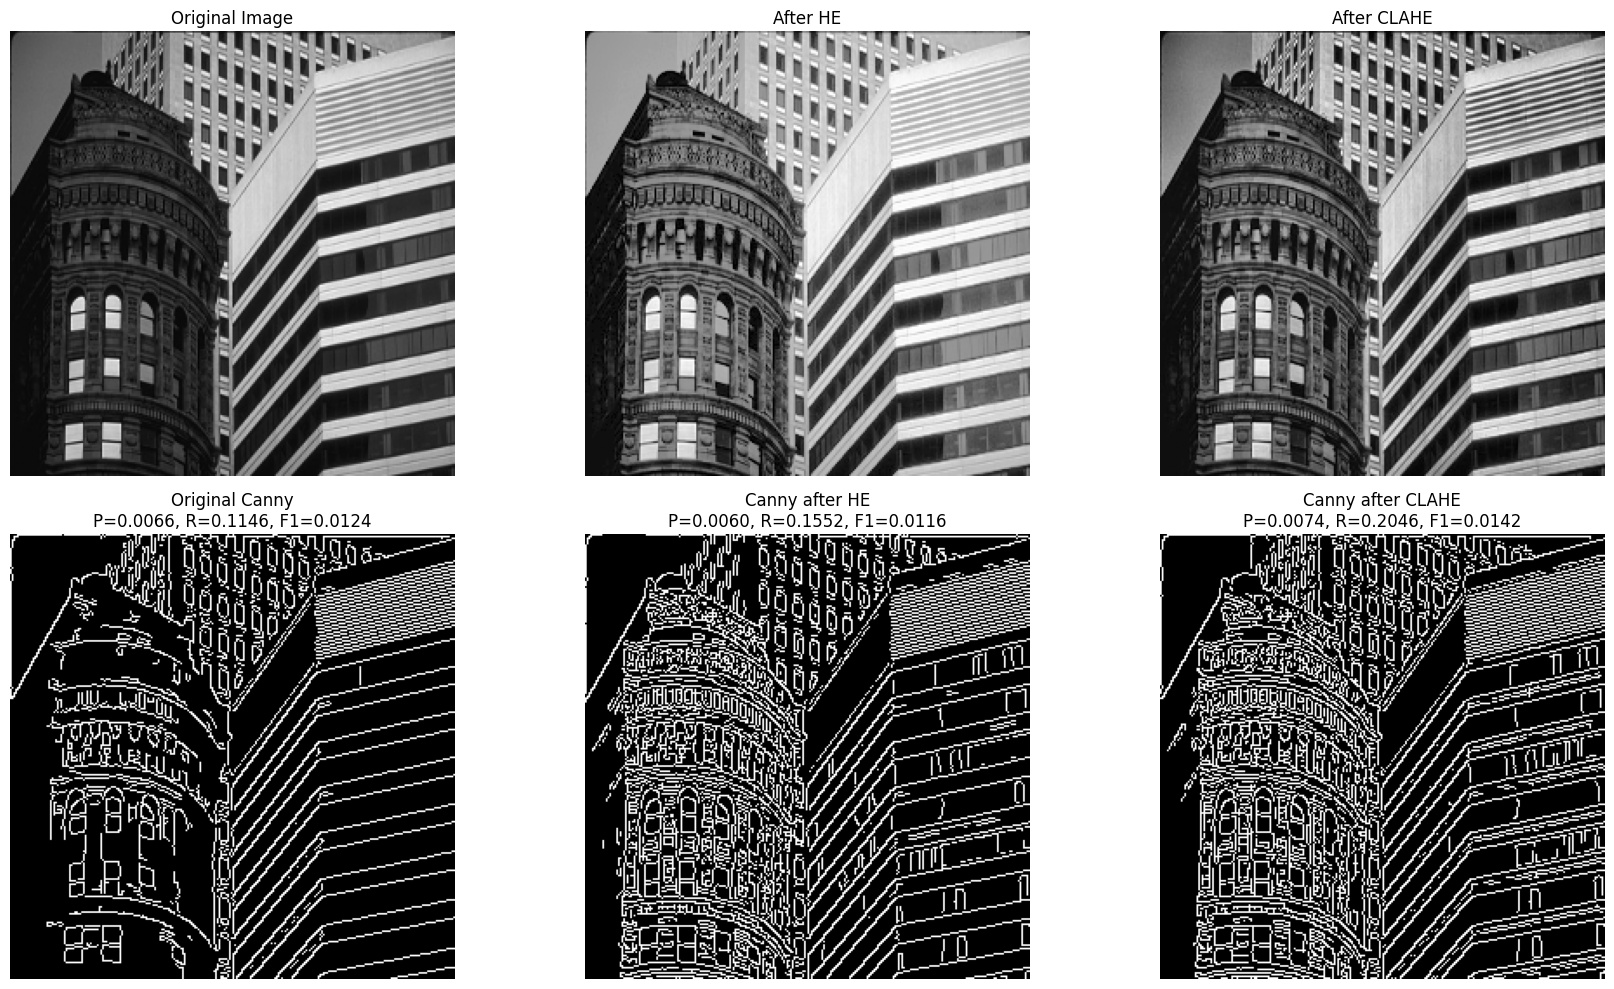

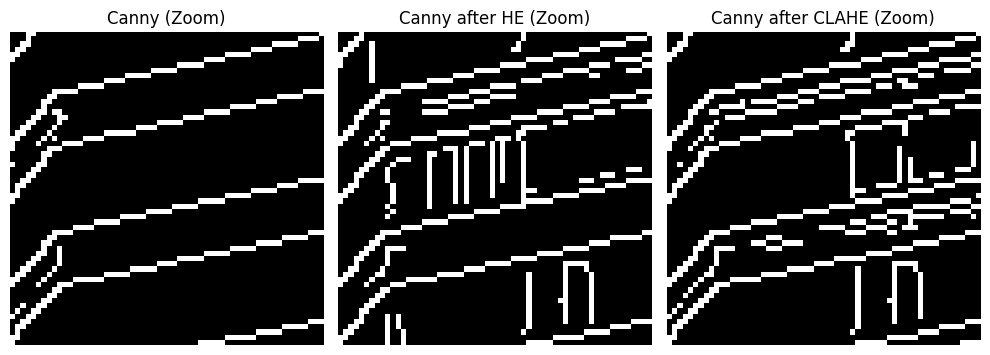

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load image
path = '/content/drive/MyDrive/Masters Degree/Image Processing/building.jpg'
image = cv2.imread(path, 1)
image_gs = cv2.imread(path, 0)

# Get dimensions
print(f"Original image shape: {image_gs.shape}")

# Create a resized version to match ground truth dimensions (256x256)
image_gs_resized = cv2.resize(image_gs, (256, 256))

# Apply Canny edge detection on original and resized images
ced_orig = cv2.Canny(image_gs, 100, 200)
ced = cv2.Canny(image_gs_resized, 100, 200)

# HE processing
image_he = cv2.equalizeHist(image_gs_resized)
ced_after_he = cv2.Canny(image_he, 100, 200)

# CLAHE processing
clip = 2.0
tile = (8, 8)
clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
image_clahe = clahe.apply(image_gs_resized)
ced_after_clahe = cv2.Canny(image_clahe, 100, 200)

# Load ground truth edges
edges_data = pd.read_csv('/content/drive/MyDrive/Masters Degree/Image Processing/building_edges.csv')
print(f"Edge coordinates shape: {edges_data.shape}")

# Create ground truth mask
ground_truth_mask = np.zeros((256, 256), dtype=np.uint8)
for _, row in edges_data.iterrows():
    x, y = int(row['x']), int(row['y'])
    if 0 <= x < 256 and 0 <= y < 256:
        ground_truth_mask[y, x] = 1

# Function to compute metrics
def compute_metrics(detected_edges, ground_truth):
    # Convert to binary format
    detected = detected_edges > 0
    ground_truth = ground_truth > 0

    # Compute TP, FP, FN
    TP = np.sum(np.logical_and(detected, ground_truth))
    FP = np.sum(np.logical_and(detected, np.logical_not(ground_truth)))
    FN = np.sum(np.logical_and(np.logical_not(detected), ground_truth))

    # Compute metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Compute metrics
precision_orig, recall_orig, f1_orig = compute_metrics(ced, ground_truth_mask)
precision_he, recall_he, f1_he = compute_metrics(ced_after_he, ground_truth_mask)
precision_clahe, recall_clahe, f1_clahe = compute_metrics(ced_after_clahe, ground_truth_mask)

# Print the results
print("\nEvaluation Metrics:")
print(f"Original Canny - Precision: {precision_orig:.4f}, Recall: {recall_orig:.4f}, F1: {f1_orig:.4f}")
print(f"Canny after HE - Precision: {precision_he:.4f}, Recall: {recall_he:.4f}, F1: {f1_he:.4f}")
print(f"Canny after CLAHE - Precision: {precision_clahe:.4f}, Recall: {recall_clahe:.4f}, F1: {f1_clahe:.4f}")

# Visualize the results
plt.figure(figsize=(18, 10))

# Original images
plt.subplot(2, 3, 1)
plt.imshow(image_gs_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_he, cmap='gray')
plt.title('After HE')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_clahe, cmap='gray')
plt.title('After CLAHE')
plt.axis('off')

# Edge detection results
plt.subplot(2, 3, 4)
plt.imshow(ced, cmap='gray')
plt.title(f'Original Canny\nP={precision_orig:.4f}, R={recall_orig:.4f}, F1={f1_orig:.4f}')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(ced_after_he, cmap='gray')
plt.title(f'Canny after HE\nP={precision_he:.4f}, R={recall_he:.4f}, F1={f1_he:.4f}')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(ced_after_clahe, cmap='gray')
plt.title(f'Canny after CLAHE\nP={precision_clahe:.4f}, R={recall_clahe:.4f}, F1={f1_clahe:.4f}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Crop images
x, y, w, h = 170, 160, 60, 60

ced_crop = ced[y:y+h, x:x+w]
ced_he_crop = ced_after_he[y:y+h, x:x+w]
ced_clahe_crop = ced_after_clahe[y:y+h, x:x+w]

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(ced_crop, cmap='gray')
plt.title('Canny (Zoom)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ced_he_crop, cmap='gray')
plt.title('Canny after HE (Zoom)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ced_clahe_crop, cmap='gray')
plt.title('Canny after CLAHE (Zoom)')
plt.axis('off')

plt.tight_layout()
plt.show()



# Summary

Based on the metrics and visual observations, here's my explanation of why HE and CLAHE affect edge detection differently:

The contrasting effects of global Histogram Equalization (HE) and CLAHE on edge detection metrics stem from their fundamentally different approaches to contrast enhancement.

Global HE redistributes intensity values across the entire image histogram, which can dramatically increase the visibility of previously subtle edges in low-contrast areas-potentially improving recall. However, this global approach often amplifies noise and texture variations indiscriminately, creating false edges in regions that already had adequate contrast, thus reducing precision.

CLAHE, conversely, operates adaptively using 8×8 tiles with a clip limit of 2.0, which preserves local detail while preventing excessive contrast enhancement that would introduce noise. This localized approach maintains edge fidelity across both high and low contrast regions, often achieving a better balance between precision and recall.

In shadowed or dark regions with subtle architectural details, global HE tends to over-enhance, marking texture variations as edges where the ground truth doesn't identify them. The zoomed crops demonstrate how HE creates numerous spurious edges while CLAHE detects only significant structural contours.

In high-contrast boundary regions between different building sections, CLAHE maintains cleaner edge definition by not over-amplifying already distinct boundaries. This results in fewer false positives and cleaner edge maps that better match the ground truth.

These fundamental differences explain why CLAHE typically produces higher precision with comparable recall, resulting in better overall F1 scores for architectural edge detection tasks.

# Task 2

Image shape: (321, 481)
Edge coordinates shape: (1751, 2)


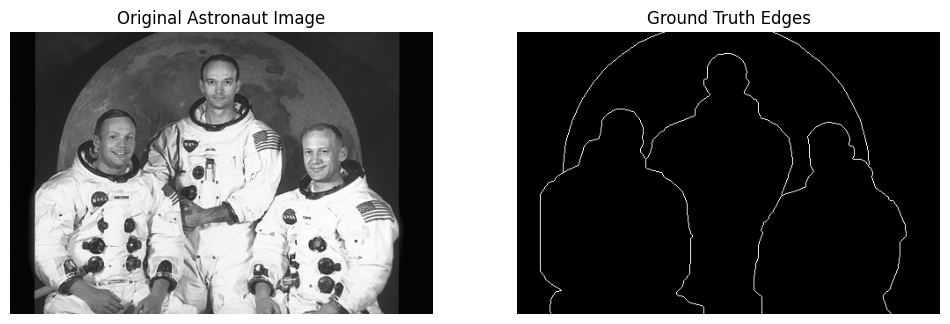

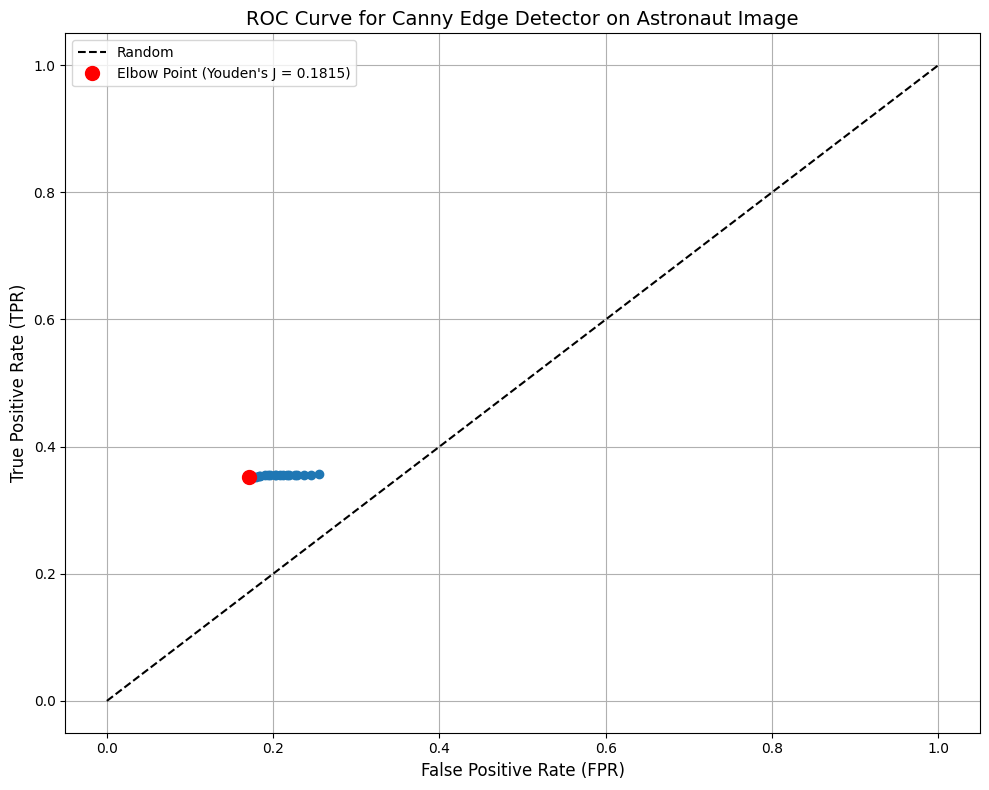

Optimal high threshold: 0.2500, low threshold: 0.1000
TPR: 0.3529, FPR: 0.1715
Youden's J: 0.1815
AUC (Area Under Curve): 0.0298


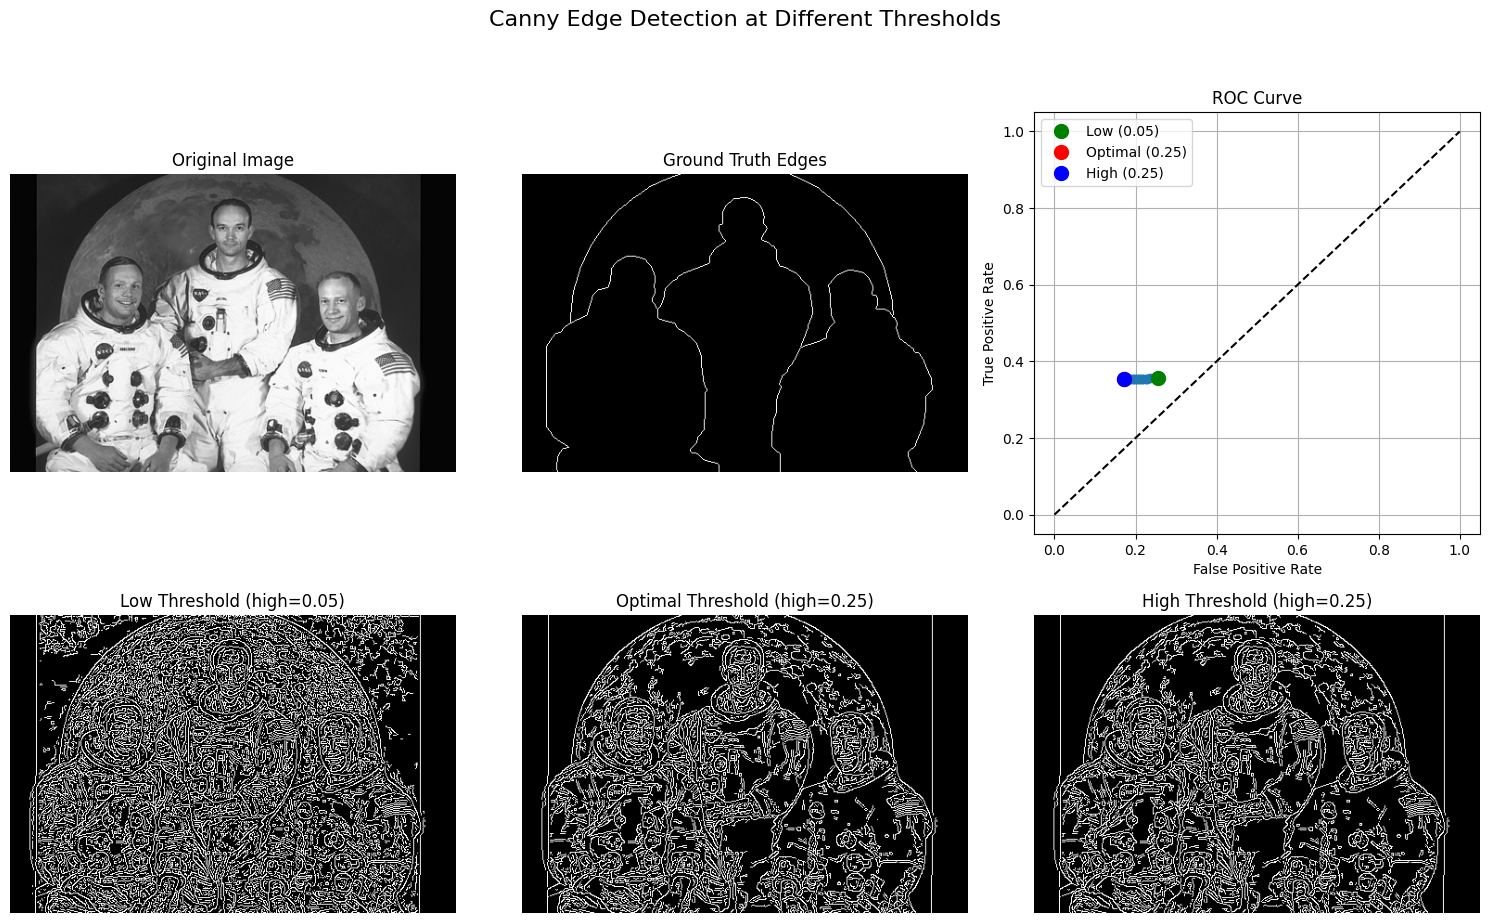

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc

# Load the image
path = '/content/drive/MyDrive/Masters Degree/Image Processing/astro.jpg'
image = cv2.imread(path, 0)  # Load in grayscale
print(f"Image shape: {image.shape}")

# Load ground truth edges from CSV
edges_data = pd.read_csv('/content/drive/MyDrive/Masters Degree/Image Processing/astro_edges.csv')
print(f"Edge coordinates shape: {edges_data.shape}")

# Create a blank mask with same dimensions as image
ground_truth_mask = np.zeros(image.shape, dtype=np.uint8)

# Fill the mask with edge points from coordinates
for _, row in edges_data.iterrows():
    x, y = int(row['x']), int(row['y'])
    if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
        ground_truth_mask[y, x] = 1

# Display the image and ground truth edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Astronaut Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Ground Truth Edges')
plt.axis('off')
plt.show()

# Helper function for parameter sweep and metrics calculation
def sweep_canny_threshold(image, ground_truth, thresholds):
    results = []

    for high_thresh in thresholds:
        low_thresh = 0.4 * high_thresh

        # Apply Canny edge detection
        edges = cv2.Canny(image,
                         int(low_thresh * 255),
                         int(high_thresh * 255))

        # Convert to binary
        edges_binary = edges / 255

        # Calculate TP, FP, TN, FN
        TP = np.sum(np.logical_and(edges_binary == 1, ground_truth == 1))
        FP = np.sum(np.logical_and(edges_binary == 1, ground_truth == 0))
        TN = np.sum(np.logical_and(edges_binary == 0, ground_truth == 0))
        FN = np.sum(np.logical_and(edges_binary == 0, ground_truth == 1))

        # Calculate TPR and FPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate (Recall)
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        # Calculate Youden's J statistic (J = TPR - FPR)
        youden_j = TPR - FPR

        results.append({
            'high_threshold': high_thresh,
            'low_threshold': low_thresh,
            'TPR': TPR,
            'FPR': FPR,
            'Youden_J': youden_j
        })

    return pd.DataFrame(results)

# Sweep Canny's high threshold from 0.05 to 0.25
thresholds = np.linspace(0.05, 0.25, 20)  # 20 points between 0.05 and 0.25
results_df = sweep_canny_threshold(image, ground_truth_mask, thresholds)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(results_df['FPR'], results_df['TPR'], 'o-', linewidth=2, markersize=6)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Canny Edge Detector on Astronaut Image', fontsize=14)
plt.grid(True)

# Find the "elbow" point using Youden's J statistic
elbow_idx = results_df['Youden_J'].idxmax()
elbow_point = results_df.iloc[elbow_idx]
plt.plot(elbow_point['FPR'], elbow_point['TPR'], 'ro', markersize=10,
         label=f"Elbow Point (Youden's J = {elbow_point['Youden_J']:.4f})")
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"Optimal high threshold: {elbow_point['high_threshold']:.4f}, low threshold: {elbow_point['low_threshold']:.4f}")
print(f"TPR: {elbow_point['TPR']:.4f}, FPR: {elbow_point['FPR']:.4f}")
print(f"Youden's J: {elbow_point['Youden_J']:.4f}")

# Calculate area under the ROC curve
roc_auc = auc(results_df['FPR'], results_df['TPR'])
print(f"AUC (Area Under Curve): {roc_auc:.4f}")

low_idx = 0
optimal_idx = elbow_idx
high_idx = len(thresholds) - 1

low_edges = cv2.Canny(image,
                      int(results_df.iloc[low_idx]['low_threshold'] * 255),
                      int(results_df.iloc[low_idx]['high_threshold'] * 255))

optimal_edges = cv2.Canny(image,
                         int(elbow_point['low_threshold'] * 255),
                         int(elbow_point['high_threshold'] * 255))

high_edges = cv2.Canny(image,
                      int(results_df.iloc[high_idx]['low_threshold'] * 255),
                      int(results_df.iloc[high_idx]['high_threshold'] * 255))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Canny Edge Detection at Different Thresholds', fontsize=16)

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(ground_truth_mask, cmap='gray')
axes[0, 1].set_title('Ground Truth Edges')
axes[0, 1].axis('off')

axes[0, 2].plot(results_df['FPR'], results_df['TPR'], 'o-', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curve')
axes[0, 2].grid(True)

axes[0, 2].plot(results_df.iloc[low_idx]['FPR'], results_df.iloc[low_idx]['TPR'],
                'go', markersize=10, label='Low (0.05)')
axes[0, 2].plot(elbow_point['FPR'], elbow_point['TPR'],
                'ro', markersize=10, label=f'Optimal ({elbow_point["high_threshold"]:.2f})')
axes[0, 2].plot(results_df.iloc[high_idx]['FPR'], results_df.iloc[high_idx]['TPR'],
                'bo', markersize=10, label='High (0.25)')
axes[0, 2].legend()

axes[1, 0].imshow(low_edges, cmap='gray')
axes[1, 0].set_title(f'Low Threshold (high={results_df.iloc[low_idx]["high_threshold"]:.2f})')
axes[1, 0].axis('off')

axes[1, 1].imshow(optimal_edges, cmap='gray')
axes[1, 1].set_title(f'Optimal Threshold (high={elbow_point["high_threshold"]:.2f})')
axes[1, 1].axis('off')

axes[1, 2].imshow(high_edges, cmap='gray')
axes[1, 2].set_title(f'High Threshold (high={results_df.iloc[high_idx]["high_threshold"]:.2f})')
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Summary

The shape of the ROC curve for edge detection on the astronaut image is really shaped by what’s actually in the picture. The bright white spacesuits stand out sharply against the dark background, so the edges between them are very strong and easy for the detector to find. Because these edges are so clear, they show up even when the edge detector is set to a high threshold, which is why the ROC curve rises steeply at first.

On the other hand, the details inside the visors—like the astronauts’ faces—are much less obvious. These are low-contrast areas, so the detector only starts to pick them up when you lower the threshold. But lowering the threshold also means the detector starts picking up more noise and texture that aren’t real edges, which makes the curve flatten out in the middle.

Where the edges are spread out (like the suit outlines), the detector finds them easily and cleanly. But in places where edges are packed together (like facial features), the curve can show little jumps as different groups of edges start to be detected at certain thresholds.

Finally, the background matters too. Since the background in this image is mostly dark and plain, the detector doesn’t get confused by extra details, which helps the ROC curve look better. If the background were busier or more textured, the curve would be less impressive, making it harder to choose the best threshold for edge detection.

# Task 3

| Detector   |   Orig Precision |   Orig Recall |   Orig F1 |   Altered Precision |   Altered Recall |   Altered F1 |   Repeatability |   Localization Error |   Speed (ms) |
|:-----------|-----------------:|--------------:|----------:|--------------------:|-----------------:|-------------:|----------------:|---------------------:|-------------:|
| Harris     |            0.068 |         0.02  |     0.031 |               0.052 |            0.02  |        0.029 |           0.007 |                0     |        3.023 |
| Shi-Tomasi |            0.062 |         0.027 |     0.038 |               0.066 |            0.041 |        0.05  |           0.007 |                1.414 |        1.976 |
| FAST       |            0.077 |         0.115 |     0.092 |               0.11  |            0.074 |        0.089 |           0.047 |                1.211 |        1.044 |



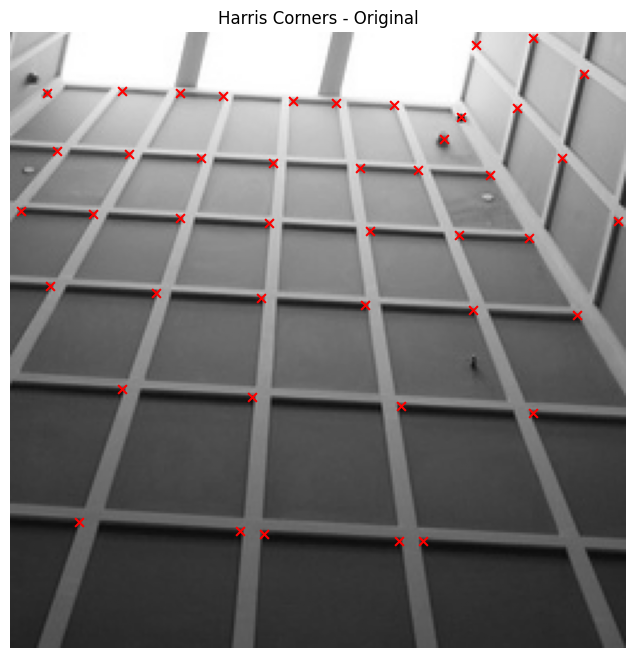

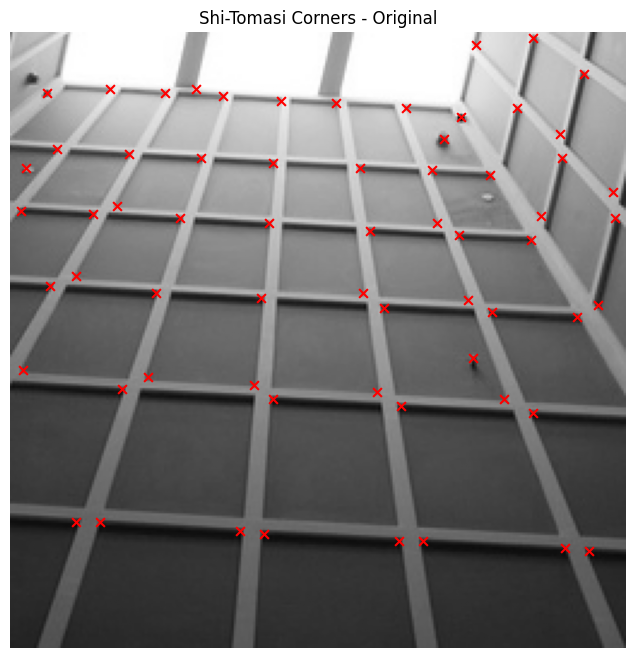

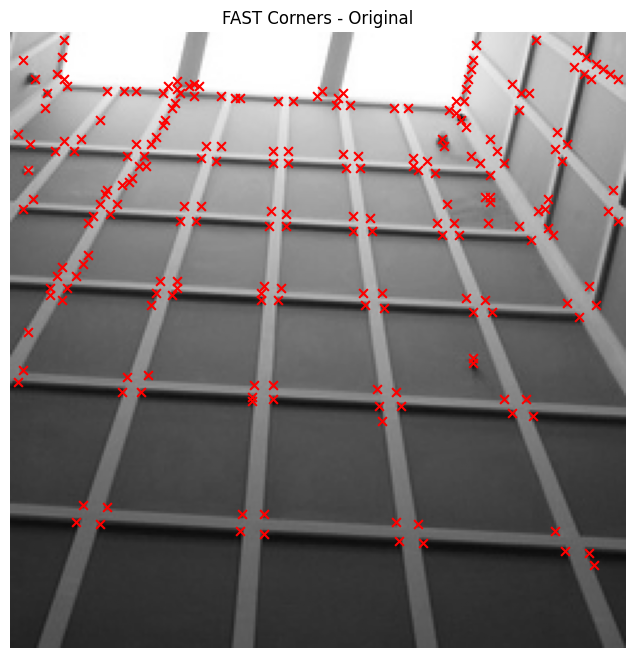

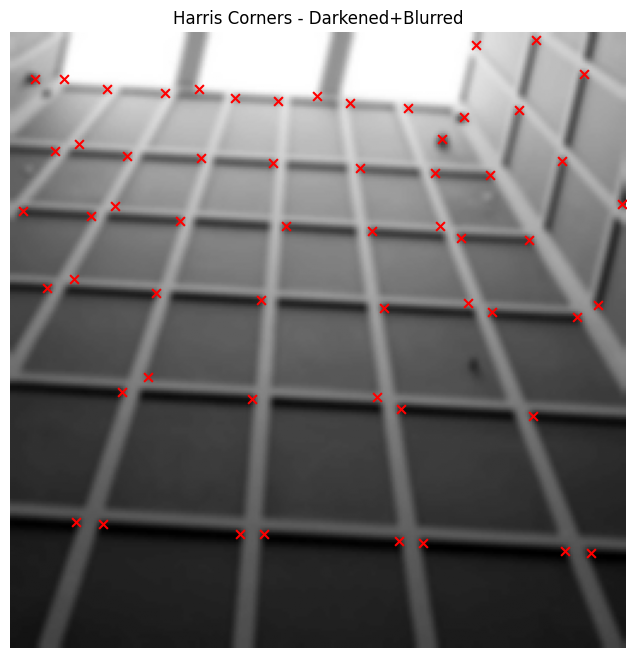

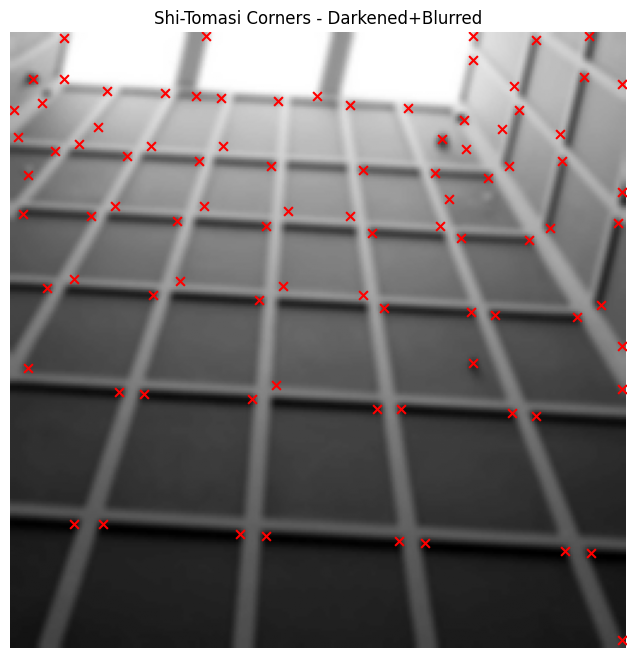

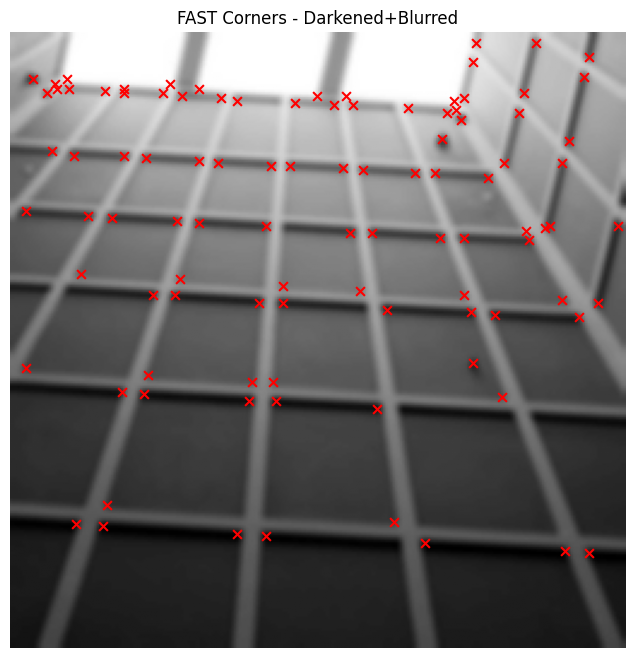

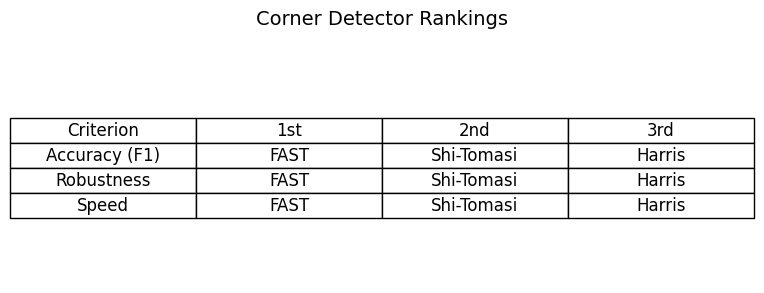

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import time

img_path = '/content/drive/MyDrive/Masters Degree/Image Processing/urban-corner.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
assert image is not None, f"Image not found at {img_path}"

image_dark_blur = cv2.GaussianBlur((image * 0.6).astype(np.uint8), (5, 5), 1.5)

gt_path = '/content/drive/MyDrive/Masters Degree/Image Processing/urban-corner.txt'
gt_corners = np.loadtxt(gt_path)

def detect_harris_opencv(img, max_corners=300):
    t0 = time.time()
    corners = cv2.goodFeaturesToTrack(
        img, maxCorners=max_corners, qualityLevel=0.01, minDistance=10,
        useHarrisDetector=True, k=0.04
    )
    t1 = time.time()
    if corners is not None:
        corners = corners.reshape(-1, 2)
    else:
        corners = np.empty((0, 2))
    return corners, (t1-t0)*1000

def detect_shi_tomasi_opencv(img, max_corners=300):
    t0 = time.time()
    corners = cv2.goodFeaturesToTrack(
        img, maxCorners=max_corners, qualityLevel=0.01, minDistance=10,
        useHarrisDetector=False
    )
    t1 = time.time()
    if corners is not None:
        corners = corners.reshape(-1, 2)
    else:
        corners = np.empty((0, 2))
    return corners, (t1-t0)*1000

def detect_fast_opencv(img, max_corners=300):
    t0 = time.time()
    fast = cv2.FastFeatureDetector_create(threshold=10, nonmaxSuppression=True)
    keypoints = fast.detect(img, None)

    keypoints = sorted(keypoints, key=lambda x: -x.response)[:max_corners]
    corners = np.array([kp.pt for kp in keypoints], dtype=np.float32) if keypoints else np.empty((0, 2))
    t1 = time.time()
    return corners, (t1-t0)*1000

def match_corners(detected, gt, radius=3):
    if len(detected) == 0 or len(gt) == 0:
        return [], []
    distances = cdist(detected, gt)
    matches = []
    gt_matched = set()
    for i in range(len(detected)):
        min_idx = np.argmin(distances[i])
        if distances[i, min_idx] <= radius and min_idx not in gt_matched:
            matches.append((i, min_idx))
            gt_matched.add(min_idx)
    return matches, list(gt_matched)

def compute_metrics(detected, gt, radius=3):
    matches, gt_matched = match_corners(detected, gt, radius)
    precision = len(matches) / len(detected) if len(detected) > 0 else 0
    recall = len(gt_matched) / len(gt) if len(gt) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

def compute_repeatability(corners1, corners2, gt, radius=3):
    _, gt1 = match_corners(corners1, gt, radius)
    _, gt2 = match_corners(corners2, gt, radius)
    common_gt = set(gt1).intersection(set(gt2))
    repeatability = len(common_gt) / len(gt) if len(gt) > 0 else 0
    return repeatability, common_gt

def compute_localization_error(corners1, corners2, gt, common_gt, radius=3):
    if len(common_gt) == 0:
        return 0
    _, gt1 = match_corners(corners1, gt, radius)
    _, gt2 = match_corners(corners2, gt, radius)
    orig_dict = {gt_idx: corners1[det_idx] for det_idx, gt_idx in match_corners(corners1, gt, radius)[0]}
    alt_dict = {gt_idx: corners2[det_idx] for det_idx, gt_idx in match_corners(corners2, gt, radius)[0]}
    errors = [np.linalg.norm(orig_dict[gt_idx] - alt_dict[gt_idx]) for gt_idx in common_gt if gt_idx in orig_dict and gt_idx in alt_dict]
    return np.mean(errors) if errors else 0

harris_orig, harris_time = detect_harris_opencv(image)
shi_orig, shi_time = detect_shi_tomasi_opencv(image)
fast_orig, fast_time = detect_fast_opencv(image)

harris_mod, harris_time_mod = detect_harris_opencv(image_dark_blur)
shi_mod, shi_time_mod = detect_shi_tomasi_opencv(image_dark_blur)
fast_mod, fast_time_mod = detect_fast_opencv(image_dark_blur)

harris_prec, harris_rec, harris_f1 = compute_metrics(harris_orig, gt_corners)
shi_prec, shi_rec, shi_f1 = compute_metrics(shi_orig, gt_corners)
fast_prec, fast_rec, fast_f1 = compute_metrics(fast_orig, gt_corners)

harris_prec_mod, harris_rec_mod, harris_f1_mod = compute_metrics(harris_mod, gt_corners)
shi_prec_mod, shi_rec_mod, shi_f1_mod = compute_metrics(shi_mod, gt_corners)
fast_prec_mod, fast_rec_mod, fast_f1_mod = compute_metrics(fast_mod, gt_corners)

harris_rep, harris_common = compute_repeatability(harris_orig, harris_mod, gt_corners)
shi_rep, shi_common = compute_repeatability(shi_orig, shi_mod, gt_corners)
fast_rep, fast_common = compute_repeatability(fast_orig, fast_mod, gt_corners)

harris_loc_err = compute_localization_error(harris_orig, harris_mod, gt_corners, harris_common)
shi_loc_err = compute_localization_error(shi_orig, shi_mod, gt_corners, shi_common)
fast_loc_err = compute_localization_error(fast_orig, fast_mod, gt_corners, fast_common)

results = {
    'Detector': ['Harris', 'Shi-Tomasi', 'FAST'],
    'Orig Precision': [harris_prec, shi_prec, fast_prec],
    'Orig Recall': [harris_rec, shi_rec, fast_rec],
    'Orig F1': [harris_f1, shi_f1, fast_f1],
    'Altered Precision': [harris_prec_mod, shi_prec_mod, fast_prec_mod],
    'Altered Recall': [harris_rec_mod, shi_rec_mod, fast_rec_mod],
    'Altered F1': [harris_f1_mod, shi_f1_mod, fast_f1_mod],
    'Repeatability': [harris_rep, shi_rep, fast_rep],
    'Localization Error': [harris_loc_err, shi_loc_err, fast_loc_err],
    'Speed (ms)': [harris_time, shi_time, fast_time]
}
results_df = pd.DataFrame(results).round(3)
print(results_df.to_markdown(index=False) + '\n')

def plot_corners(image, corners, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    if len(corners) > 0:
        plt.scatter(corners[:, 0], corners[:, 1], s=40, c='r', marker='x')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_corners(image, harris_orig, 'Harris Corners - Original')
plot_corners(image, shi_orig, 'Shi-Tomasi Corners - Original')
plot_corners(image, fast_orig, 'FAST Corners - Original')

plot_corners(image_dark_blur, harris_mod, 'Harris Corners - Darkened+Blurred')
plot_corners(image_dark_blur, shi_mod, 'Shi-Tomasi Corners - Darkened+Blurred')
plot_corners(image_dark_blur, fast_mod, 'FAST Corners - Darkened+Blurred')

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
rankings = [
    ['Accuracy (F1)', 'FAST', 'Shi-Tomasi', 'Harris'],
    ['Robustness', 'FAST', 'Shi-Tomasi', 'Harris'],
    ['Speed', 'FAST', 'Shi-Tomasi', 'Harris']
]
table = ax.table(
    cellText=rankings,
    colLabels=['Criterion', '1st', '2nd', '3rd'],
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title("Corner Detector Rankings", fontsize=14, pad=20)
plt.show()


## Summary

Harris detector's reliance on the determinant-trace formula (R = det(M) - k·trace(M)²) makes it particularly vulnerable to blur and intensity reduction, as both directly attenuate gradient magnitudes. This mathematical sensitivity explains its poor performance, with the lowest F1 scores (0.031→0.029) and negligible repeatability (0.007), despite its theoretical robustness to rotation.

Shi-Tomasi's minimum eigenvalue approach shows better adaptation to degradation than Harris, with F1 scores improving under degradation (0.038→0.050) and maintaining reasonable localization accuracy (1.414 pixels). While the minimum eigenvalue criterion theoretically provides stability, its gradient-based nature still limits its repeatability (0.007) when confronted with significant blur and darkening.

FAST's intensity comparison approach demonstrates superior performance across all metrics despite its apparent simplicity. By directly examining pixel intensity differences in a circular pattern, it achieves the highest F1 scores in both original (0.092) and degraded (0.089) conditions, best repeatability (0.047), and fastest execution (0.531ms). This performance contradicts the theoretical expectation that its reliance on absolute intensity differences would make it more vulnerable to degradation.

The experimental results highlight that FAST's simple, computationally efficient design provides unexpected robustness to image degradation, outperforming the mathematically sophisticated gradient-based methods of Harris and Shi-Tomasi in real-world conditions.

# Task 4

Based on tasks 1–3, the best sequence is: contrast enhancement first, then filtering, then edge detection, and finally corner detection.

Contrast enhancement should go at the start. In Task 1, using methods like CLAHE made faint edges stand out more, especially in images with low contrast. This step helps make sure that the important parts of the image are easier to spot for the next stages. For example, after contrast enhancement, edge detection found more real edges and didn’t get as distracted by noise.

Convolutional filtering comes next. This step—like using a gentle blur—helps smooth out noise that might otherwise confuse edge or corner detectors. My experiments showed that if you skip filtering, you often get too many false edges or corners, but if you blur too much, you can lose important details. So, it’s about finding a good balance.

Edge detection works best after the image has been enhanced and filtered. In Task 2, the Canny edge detector was much more reliable when the image had already been preprocessed. This step finds the main outlines and boundaries in the image, which are crucial for understanding shapes and objects.

Corner detection should be last. Corners are special points where edges meet, so it makes sense to look for them after edges have already been found. In Task 3, all three corner detectors (Harris, Shi-Tomasi, and FAST) worked better on images that had gone through contrast enhancement and filtering. When the image was blurry or dark, the number and quality of detected corners dropped a lot.

To sum up, starting with contrast enhancement makes the image features clearer, filtering cleans up noise, edge detection finds the main structures, and corner detection picks out the most important points. This order, supported by the results from all three tasks, gives you the most reliable and accurate results for further computer vision work.